In [2]:
## Load Library
from sklearn.datasets import load_iris
from sklearn.metrics import fowlkes_mallows_score, silhouette_score
import matplotlib.pyplot as plt
import numpy as np
import random
import math

# Algorithm Implementation

## K-Means Clustering Algorithm

In [3]:
# K-Means Implemetation
### n_clusters : The number of clusters to form as well as the number of centroids to generate
### tol : Tolerance to declare convergence
### max_iter : Maximum number of iterations of the k-means algorithm for a single run
class KMeans():
    cluster_centers_ = None
    labels_ = None
    
    def __init__(self, n_clusters=8, tol=0.01, max_iter=300):
        self.n_clusters = n_clusters
        self.tol = tol
        self.max_iter = max_iter
    
    def chooseCenters(self, X):
        """ Choose random k-cluster centers
        Example
        Input : [[1.0, 1.0], [2.0, 2.0], [3.0, 3.0], [4.0, 4.0]]
        Output : [[1.0, 1.0], [4.0, 4.0]] # if n_clusters is 2
        """
        random_indeces = np.random.choice(X.shape[0], size=self.n_clusters, replace=False)
        return X[random_indeces, :]
    
    def calculateDistance(self, data, center):
        """ Calculate distance between a data and a cluster center using euclidean formula
        Example
        Input : data = [2.0, 3.0], center = [10.0, 8.0]
        Output : ((2.0-10.0)^2 + (3.0-8.0)^2)^1/2
        """
        jarak = 0
        for i in range(len(data)):
            jarak += math.pow(center[i] - data[i], 2)
        return math.sqrt(jarak)
        
    def updateCenters(self, X):
        """ Update all cluster centers using mean of the data in the cluster
        Example
        Input : X = [[1.0, 1.0], [2.0, 2.0], [3.0, 3.0], [4.0, 4.0]], labels = [0, 0, 1, 1]
        Output : [[1.5, 1.5], [3.5, 3.5]]
        """
        count = np.zeros(self.n_clusters)
        sum_data = np.zeros((self.n_clusters, X.shape[1]))
        
        # Calculate sum for all clusters
        for i in range(len(self.labels_)):
            count[self.labels_[i]] = count[self.labels_[i]] + 1
            sum_data[self.labels_[i]] = np.add(sum_data[self.labels_[i]], X[i]) 
            
        # Calculate means for all clusters
        updated = np.zeros((self.n_clusters, X.shape[1]))
        for i in range(len(self.cluster_centers_)):
            if (count[i] != 0):
                updated[i] = sum_data[i]/count[i]
            
        return updated
        
    def calculateError(self, X):
        """ Update all cluster centers using mean of the data in the cluster
        Example
        Input : X = [[1.0, 1.0], [2.0, 2.0], [3.0, 3.0], [4.0, 4.0]], centers = [[1.5, 1.5], [3.5, 3.5]]
        Output : Total euclidean distance between all data and its cluster centers
        """
        error = 0.0
        for i in range(len(X)):
            temp = 0.0
            for j in range(len(X[i])) :
                temp += math.pow(X[i][j] - self.cluster_centers_[self.labels_[i]][j], 2)
            error += math.sqrt(temp)
            
        return error
        
    def fit(self, X):
        self.cluster_centers_ = np.zeros((self.n_clusters, X.shape[1]))
        self.labels_ = np.zeros(X.shape[0], dtype=int)
        
        # Choose random k-cluster centers
        self.cluster_centers_ = self.chooseCenters(X)
        
        # Clustering Part
        run = True
        while (run):
            # Iterate the data to clustering
            for idx_data in range(0, len(X)):
                best_distance = 99999999
                cluster_choosen = -1

                # Calucalate the distance from data to all cluster centers
                for idx_center in range(0, len(self.cluster_centers_)):
                    distance = self.calculateDistance(X[idx_data], self.cluster_centers_[idx_center])
                    if (distance < best_distance):
                        best_distance = distance
                        cluster_choosen = idx_center

                # Put data to nearest cluster
                if (cluster_choosen != -1):
                    self.labels_[idx_data] = cluster_choosen

            # Calculate mean centers after clustering
            updated_cluster_centers_ = self.updateCenters(X)

            # Calculate error
            error = self.calculateError(X)
            
            # Check terimate condition
            if (np.array_equal(updated_cluster_centers_,self.cluster_centers_) or error <= 0.05):
                run = False
                
            # Change current cluster centers with updated cluster centers
            self.cluster_centers_ = updated_cluster_centers_
            
        return self

## Agglomerative Clustering Algorithm

In [4]:
### Agglomerative
### n_clusters : The number of clusters to form
### linkage : Which linkage criterion to use. value : "single", "complete", "avg", "avg_group"
class Agglomerative():
    labels_ = None
    
    def __init__(self, linkage="single", n_clusters=4):
        self.linkage = linkage
        self.n_clusters = n_clusters
    
    def calculateCentroid(self, cluster):
        # cent = np.array([0.0,0.0,0.0,0.0])
        cent = np.zeros(len(cluster[0]))
        for point in cluster:
            cent += point
        return cent/len(cluster)
    
    def euclideanDistance(self, point1, point2):
        sum_of_squares = 0
        for i in range(len(point1)):
            sum_of_squares += (point1[i]-point2[i])**2
        
        return math.sqrt(sum_of_squares)
    
    def single(self, cluster1, cluster2):
        min_dist = self.euclideanDistance(cluster1[0], cluster2[0])
        for i in range(len(cluster1)):
            for j in range(len(cluster2)):
                tmp = self.euclideanDistance(cluster1[i], cluster2[j])
                if (tmp < min_dist):
                    min_dist = tmp
        
        return min_dist
    
    def complete(self, cluster1, cluster2):
        max_dist = self.euclideanDistance(cluster1[0], cluster2[0])
        for i in range(len(cluster1)):
            for j in range(len(cluster2)):
                tmp = self.euclideanDistance(cluster1[i], cluster2[j]);
                if (tmp > max_dist):
                    max_dist = tmp
        
        return max_dist
    
    def average(self, cluster1, cluster2):
        dist_sum = 0
        for i in range(len(cluster1)):
            for j in range(len(cluster2)):
                dist_sum += self.euclideanDistance(cluster1[i], cluster2[j])
        
        return dist_sum/(len(cluster1)*len(cluster2))
    
    def averageGroup(self, cluster1, cluster2):
        cent1 = self.calculateCentroid(cluster1)
        cent2 = self.calculateCentroid(cluster2)
        
        return self.euclideanDistance(cent1, cent2)
    
    def calculateDistance(self, cluster1, cluster2):
        if self.linkage == 'single':
            return self.single(cluster1, cluster2)
        elif self.linkage == 'complete':
            return self.complete(cluster1, cluster2)
        elif self.linkage == 'avg':
            return self.average(cluster1, cluster2)
        elif self.linkage == 'avg_group':
            return self.averageGroup(cluster1, cluster2)
        else:
            raise ValueError('The linkage you have chosen is undefined')
    
    def fit(self, X):
        self.labels_ = np.zeros(X.shape[0])
        clusters = []
        # Debug tool
        deb = []
        for i in range(X.shape[0]):
            deb.append([i])
            clusters.append([X[i].tolist()])
            
        # Clustering until desired amount of cluster
        while (len(clusters) > self.n_clusters):
            # Searching for the minimum proximity
            # Minid --> row and column of the minimum link
            # Minva --> the value of the minimum link
            minid = [0,1];
            minva = self.calculateDistance(clusters[0], clusters[1])
            for i in range(0,len(clusters)):
                for j in range(i+1, len(clusters)):
                    tmp = self.calculateDistance(clusters[i], clusters[j])
                    if (tmp < minva):
                        minid = [i,j]
                        minva = tmp
            
            # Joining two clusters

            clusters[minid[0]] = clusters[minid[0]] + clusters.pop(minid[1])
            deb[minid[0]] = deb[minid[0]] + deb.pop(minid[1])
        
        # Labelling clusters data
        label = 0
        for cluster in deb:
            for point in cluster:
                self.labels_[point] = label
            label += 1
        return self

# Testing Algorithms

In [5]:
## Load data
data = load_iris()
features = data['feature_names']

In [6]:
## Extract data 
X_data = np.array(data['data'])
Y_data = np.array(data['target'])

In [7]:
## Clustering data
# K-Means Clustering
kmeans = KMeans(n_clusters=3).fit(X_data)
print(kmeans.labels_)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]


In [8]:
# Agglomerative Clustering
agg = Agglomerative(linkage="single", n_clusters=3).fit(X_data)
print(agg.labels_)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [8]:
# Agglomerative Clustering
agg1 = Agglomerative(linkage="complete", n_clusters=3).fit(X_data)
print(agg1.labels_)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 1. 1. 2. 1. 2. 1. 2. 1. 2. 2. 2. 2. 1. 2. 1. 2. 2. 1. 2. 1. 2.
 1. 1. 1. 1. 1. 1. 1. 2. 2. 2. 2. 1. 2. 1. 1. 1. 2. 2. 2. 1. 2. 2. 2. 2.
 2. 1. 2. 2. 1. 1. 1. 1. 1. 1. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [10]:
# Agglomerative Clustering
agg2 = Agglomerative(linkage="avg", n_clusters=3).fit(X_data)
print(agg2.labels_)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 2. 1. 2. 2. 2. 2. 1. 2. 2. 2. 2. 2. 2. 1. 1. 2. 2. 2. 2. 1.
 2. 1. 2. 1. 2. 2. 1. 1. 2. 2. 2. 2. 2. 1. 2. 2. 2. 2. 1. 2. 2. 2. 1. 2.
 2. 2. 1. 2. 2. 1.]


In [10]:
# Agglomerative Clustering
agg3 = Agglomerative(linkage="avg_group", n_clusters=3).fit(X_data)
print(agg3.labels_)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 2. 1. 2. 2. 2. 2. 1. 2. 2. 2. 2. 2. 2. 1. 1. 2. 2. 2. 2. 1.
 2. 1. 2. 1. 2. 2. 1. 1. 2. 2. 2. 2. 2. 1. 2. 2. 2. 2. 1. 2. 2. 2. 1. 2.
 2. 2. 1. 2. 2. 1.]


# Evaluation Metrics

## K-Means

In [11]:
print('Fowlkes-Mallows', fowlkes_mallows_score(Y_data, kmeans.labels_))
print('Silhouette Coefficient', silhouette_score(X_data, kmeans.labels_))

Fowlkes-Mallows 0.8208080729114153
Silhouette Coefficient 0.5528190123564091


## Agglomerative : Single Linkage

In [12]:
print('Fowlkes-Mallows', fowlkes_mallows_score(Y_data, agg.labels_))
print('Silhouette Coefficient', silhouette_score(X_data, agg.labels_))

Fowlkes-Mallows 0.7635170681000877
Silhouette Coefficient 0.5121107753649304


## Agglomerative : Complete Linkage

In [13]:
print('Fowlkes-Mallows', fowlkes_mallows_score(Y_data, agg1.labels_))
print('Silhouette Coefficient', silhouette_score(X_data, agg1.labels_))

Fowlkes-Mallows 0.7686371028513819
Silhouette Coefficient 0.5135953221192208


## Agglomerative : Average Linkage

In [14]:
print('Fowlkes-Mallows', fowlkes_mallows_score(Y_data, agg2.labels_))
print('Silhouette Coefficient', silhouette_score(X_data, agg2.labels_))

Fowlkes-Mallows 0.8407289157574822
Silhouette Coefficient 0.5541608580282847


## Agglomerative : Average Group Linkage

In [15]:
print('Fowlkes-Mallows', fowlkes_mallows_score(Y_data, agg3.labels_))
print('Silhouette Coefficient', silhouette_score(X_data, agg3.labels_))

Fowlkes-Mallows 0.8407289157574822
Silhouette Coefficient 0.5541608580282847


# Data Visualization

## K-Means plot

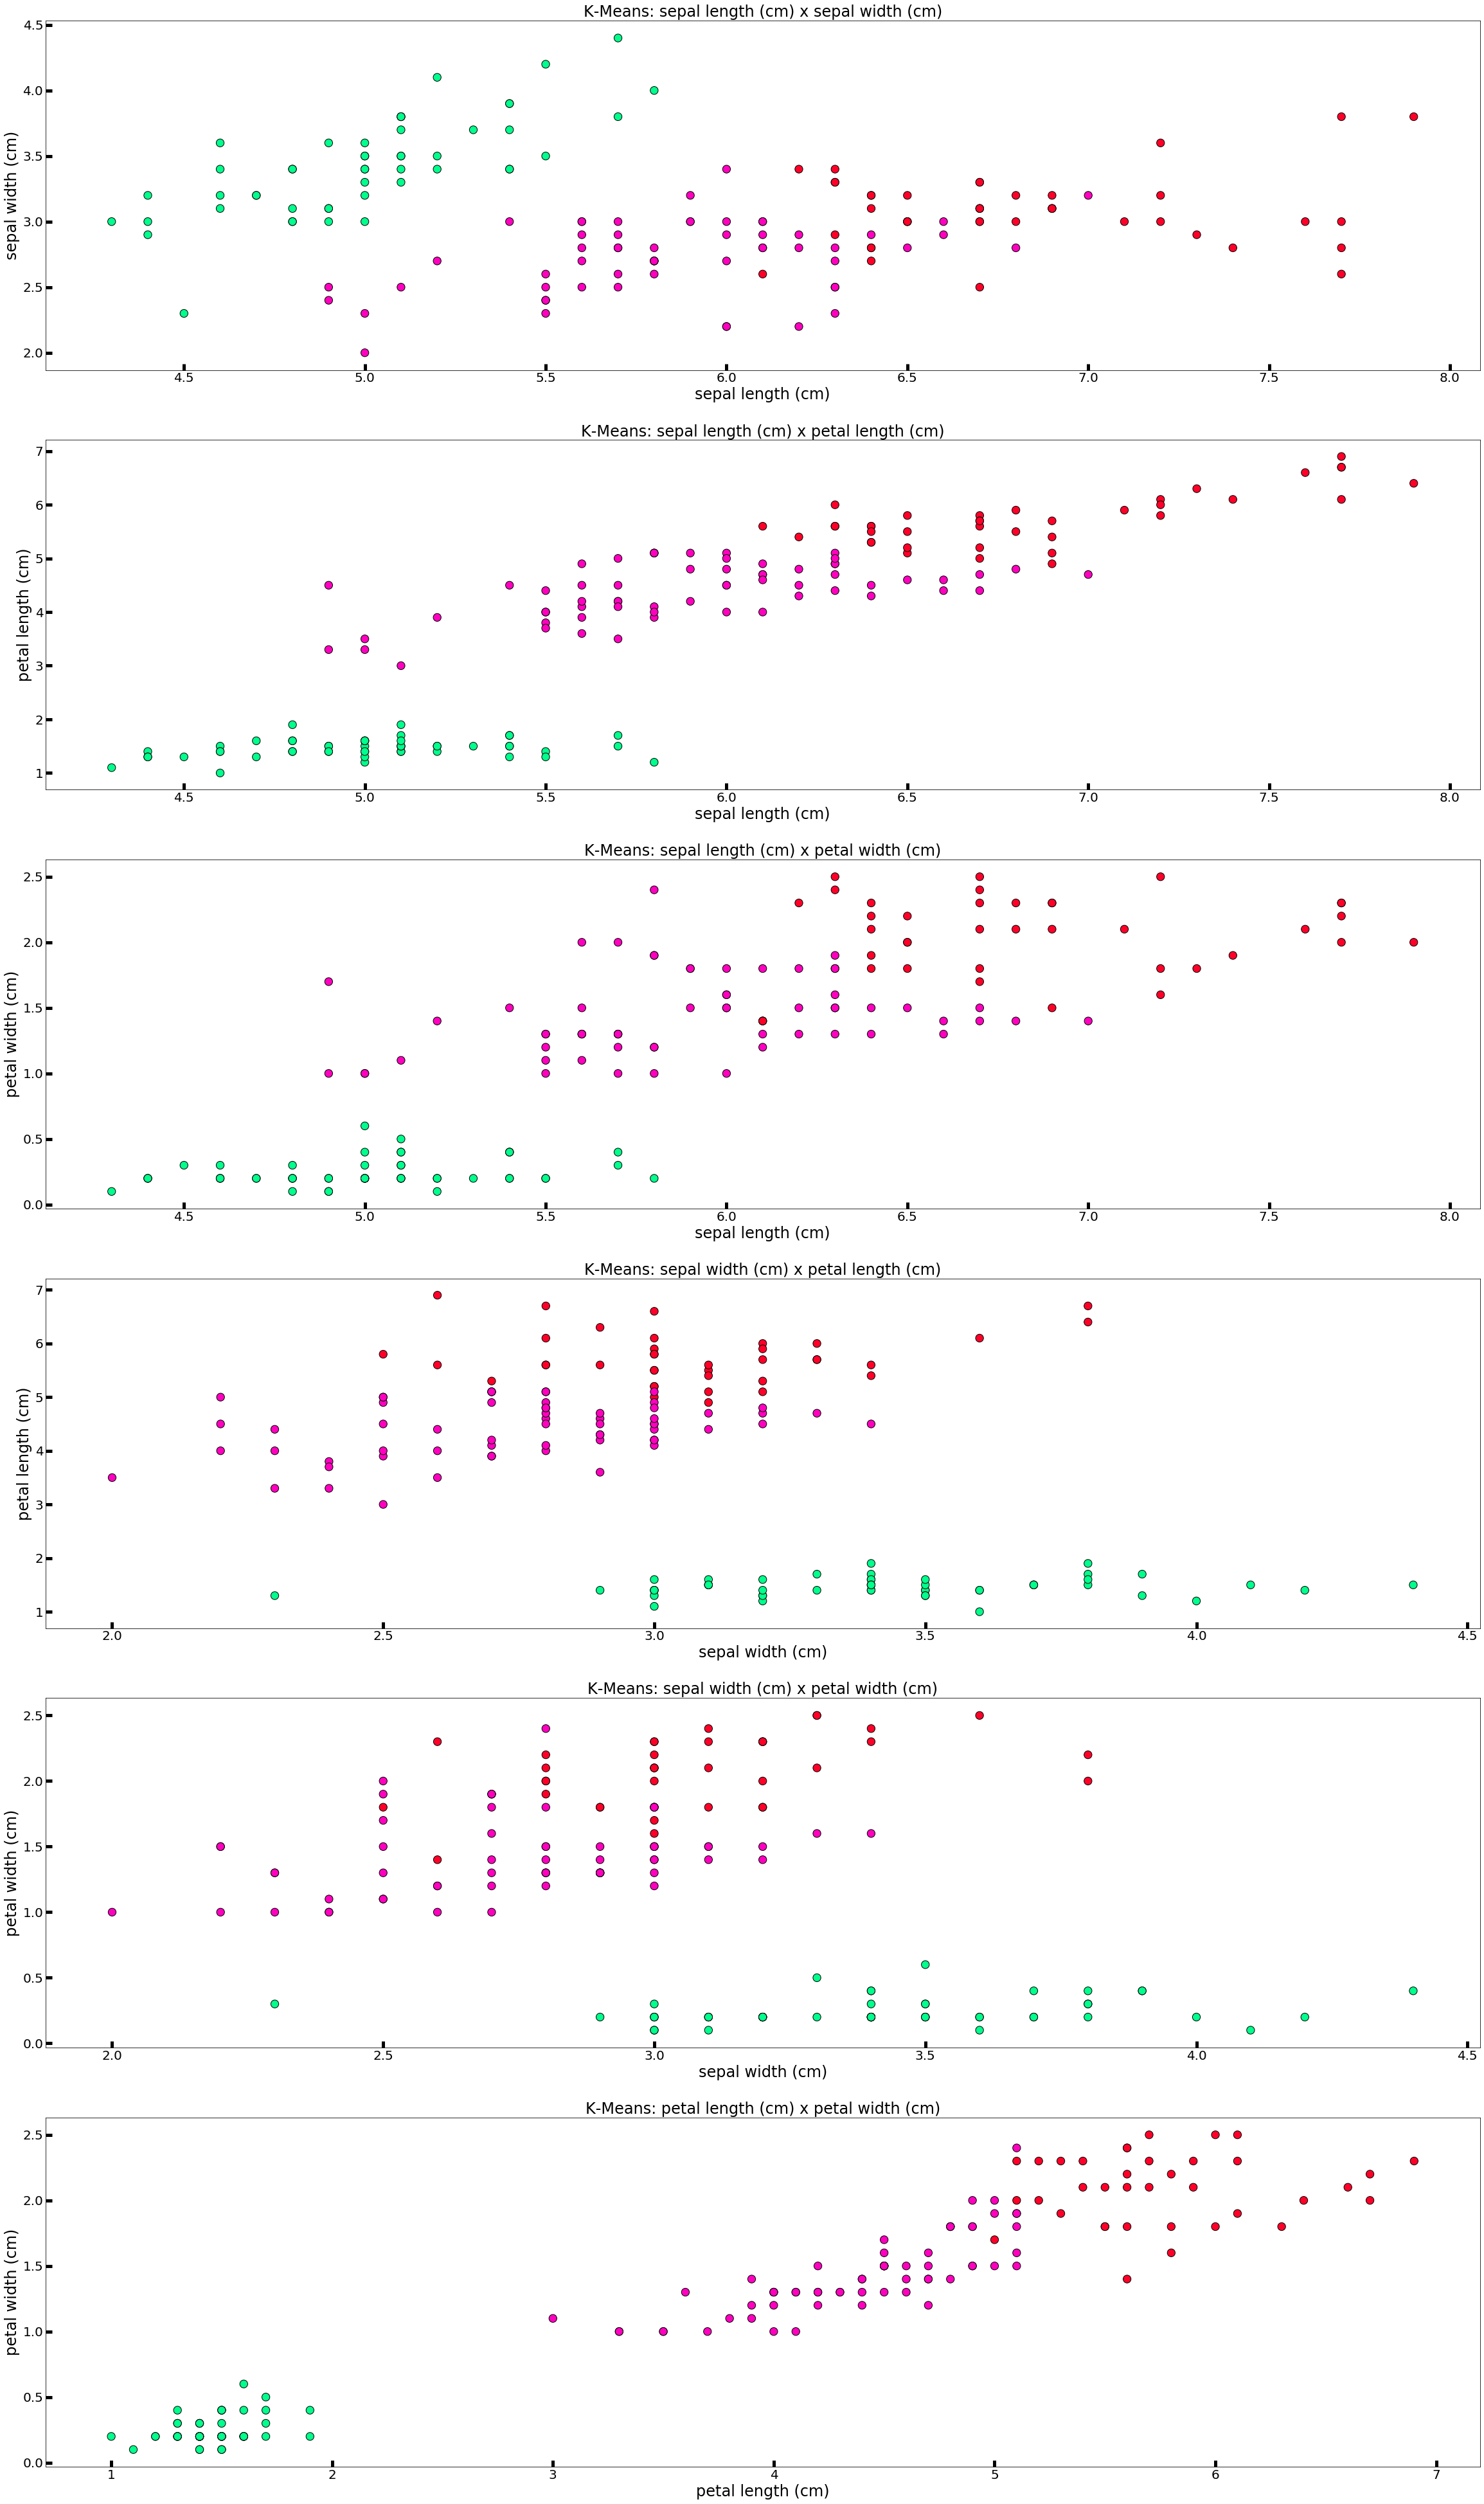

In [18]:
## Visualize data
total_plots = 0.5*(len(features)-1)*(1+len(features)-1)
fig, axes = plt.subplots(int(total_plots), figsize=(40, 70))
# fig, axes = plt.subplots(1, 3, figsize=(40,70))

curr_idx = 0
for i in range(len(features)-1):
    for j in range (i+1, len(features)):
        axes[curr_idx].scatter(X_data[:, i], X_data[:, j], c=kmeans.labels_, cmap='gist_rainbow',
        edgecolor='k', s=150)
        axes[curr_idx].set_xlabel(features[i], fontsize=24)
        axes[curr_idx].set_ylabel(features[j], fontsize=24)
        axes[curr_idx].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
        axes[curr_idx].set_title('K-Means: '+features[i]+' x '+features[j], fontsize=24)
        curr_idx += 1

plt.show()

# Analisis K-Means

Hasil algoritma K-Means selalu berubah-ubah tergantung dengan inisialisasi cluster center awal. Artinya, algoritma ini bisa menghasilkan hasil yang hanya lokal optimal dan bersifat tidak scalable. Lalu, karena untuk menentukan clusternya menggunakan rata-rata maka, algoritma ini sangat peka terhadap outlier.

## Agglomerative Single Linkage plot

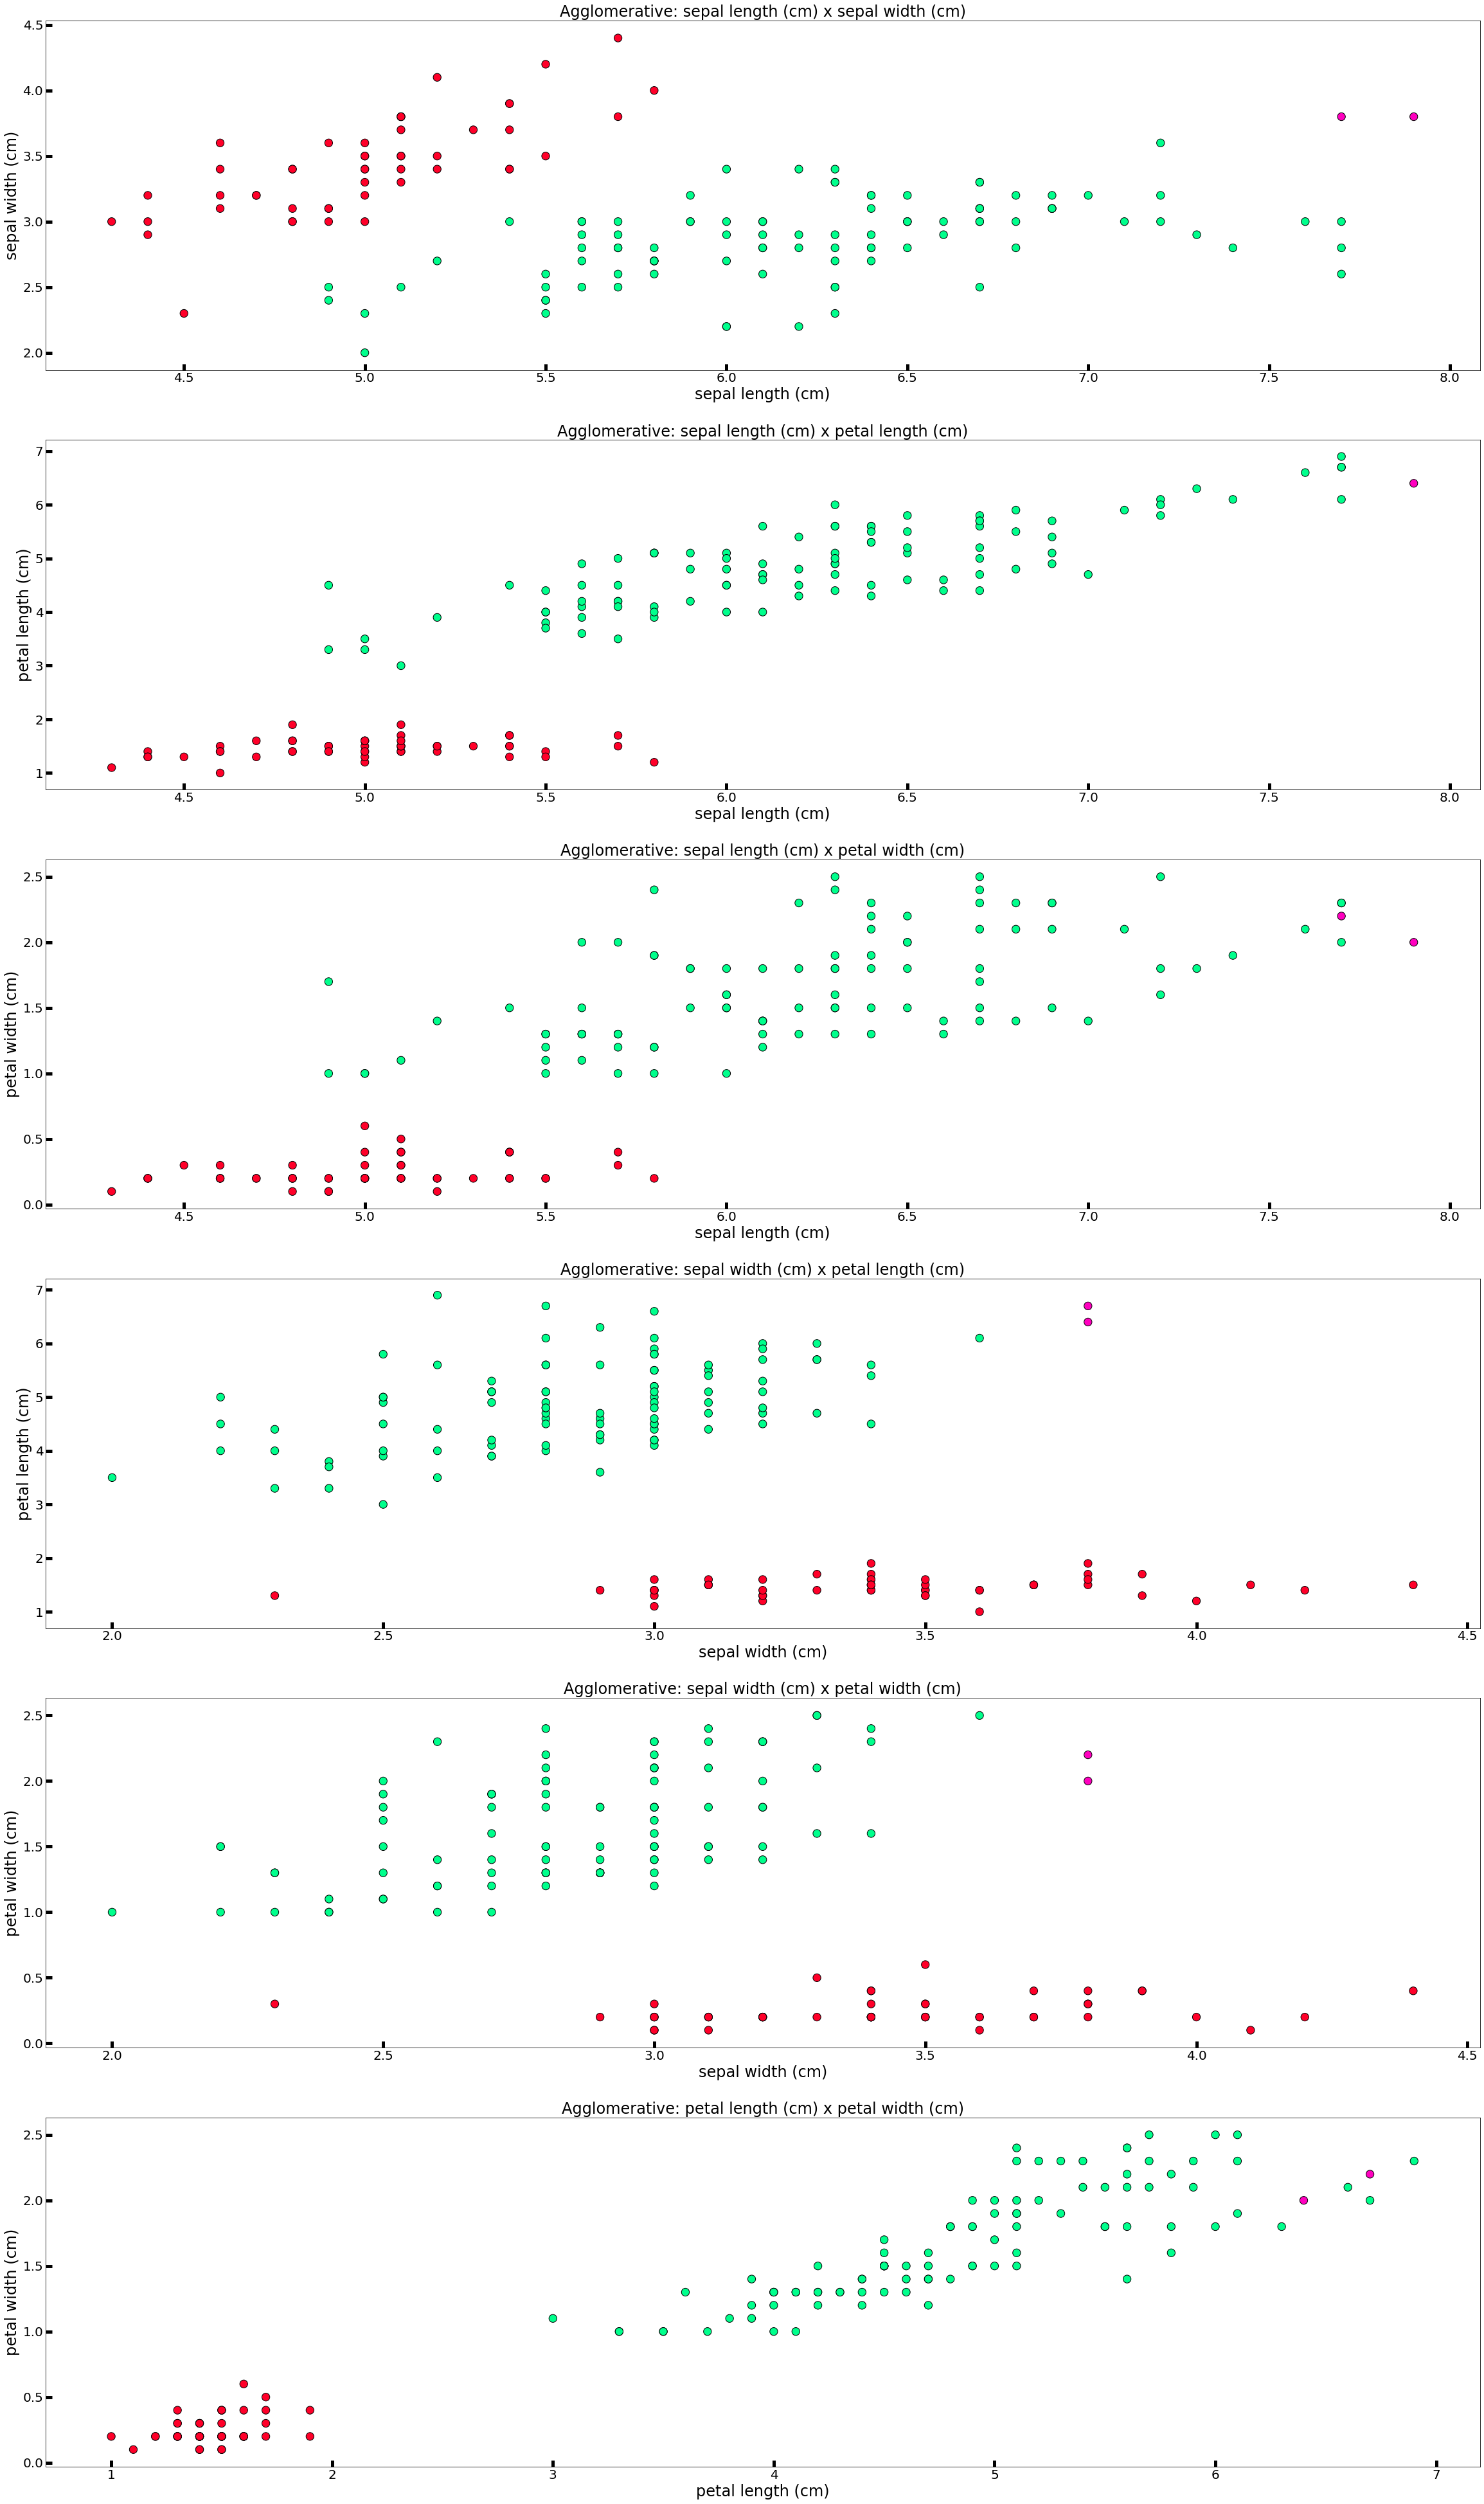

In [19]:
## Visualize data
total_plots = 0.5*(len(features)-1)*(1+len(features)-1)
fig, axes = plt.subplots(int(total_plots), figsize=(40, 70))

curr_idx = 0
for i in range(len(features)-1):
    for j in range (i+1, len(features)):
        
        axes[curr_idx].scatter(X_data[:, i], X_data[:, j], c=agg.labels_, cmap='gist_rainbow',
        edgecolor='k', s=150)
        axes[curr_idx].set_xlabel(features[i], fontsize=24)
        axes[curr_idx].set_ylabel(features[j], fontsize=24)
        axes[curr_idx].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
        axes[curr_idx].set_title('Agglomerative: '+features[i]+' x '+features[j], fontsize=24)
        curr_idx += 1

plt.show()

### Analisis Single Linkage

Kluster yang dihasilkan dengan single linkage menampilkan tiap data pada kluster memiliki jarak yang dekat dengan tetangganya pada kluster yang sama. Dapat dilihat bahwa hanya kluster data kedua hanya terdiri dari dua data, karena memang kedua data tersebut adalah yang terdekat satu sama lain dibandingkan data pada cluster lain. Dalam kasus tertentu, hal ini bisa saja disebabkan karena *chaining effect*, yaitu suatu cluster terbentuk karena adanya *noisy pattern* yang berdekatan dengan data yang sebenarnya, sehingga bisa jadi kluster yang terbentuk menjadi kurang akurat.

## Agglomerative Complete Linkage plot

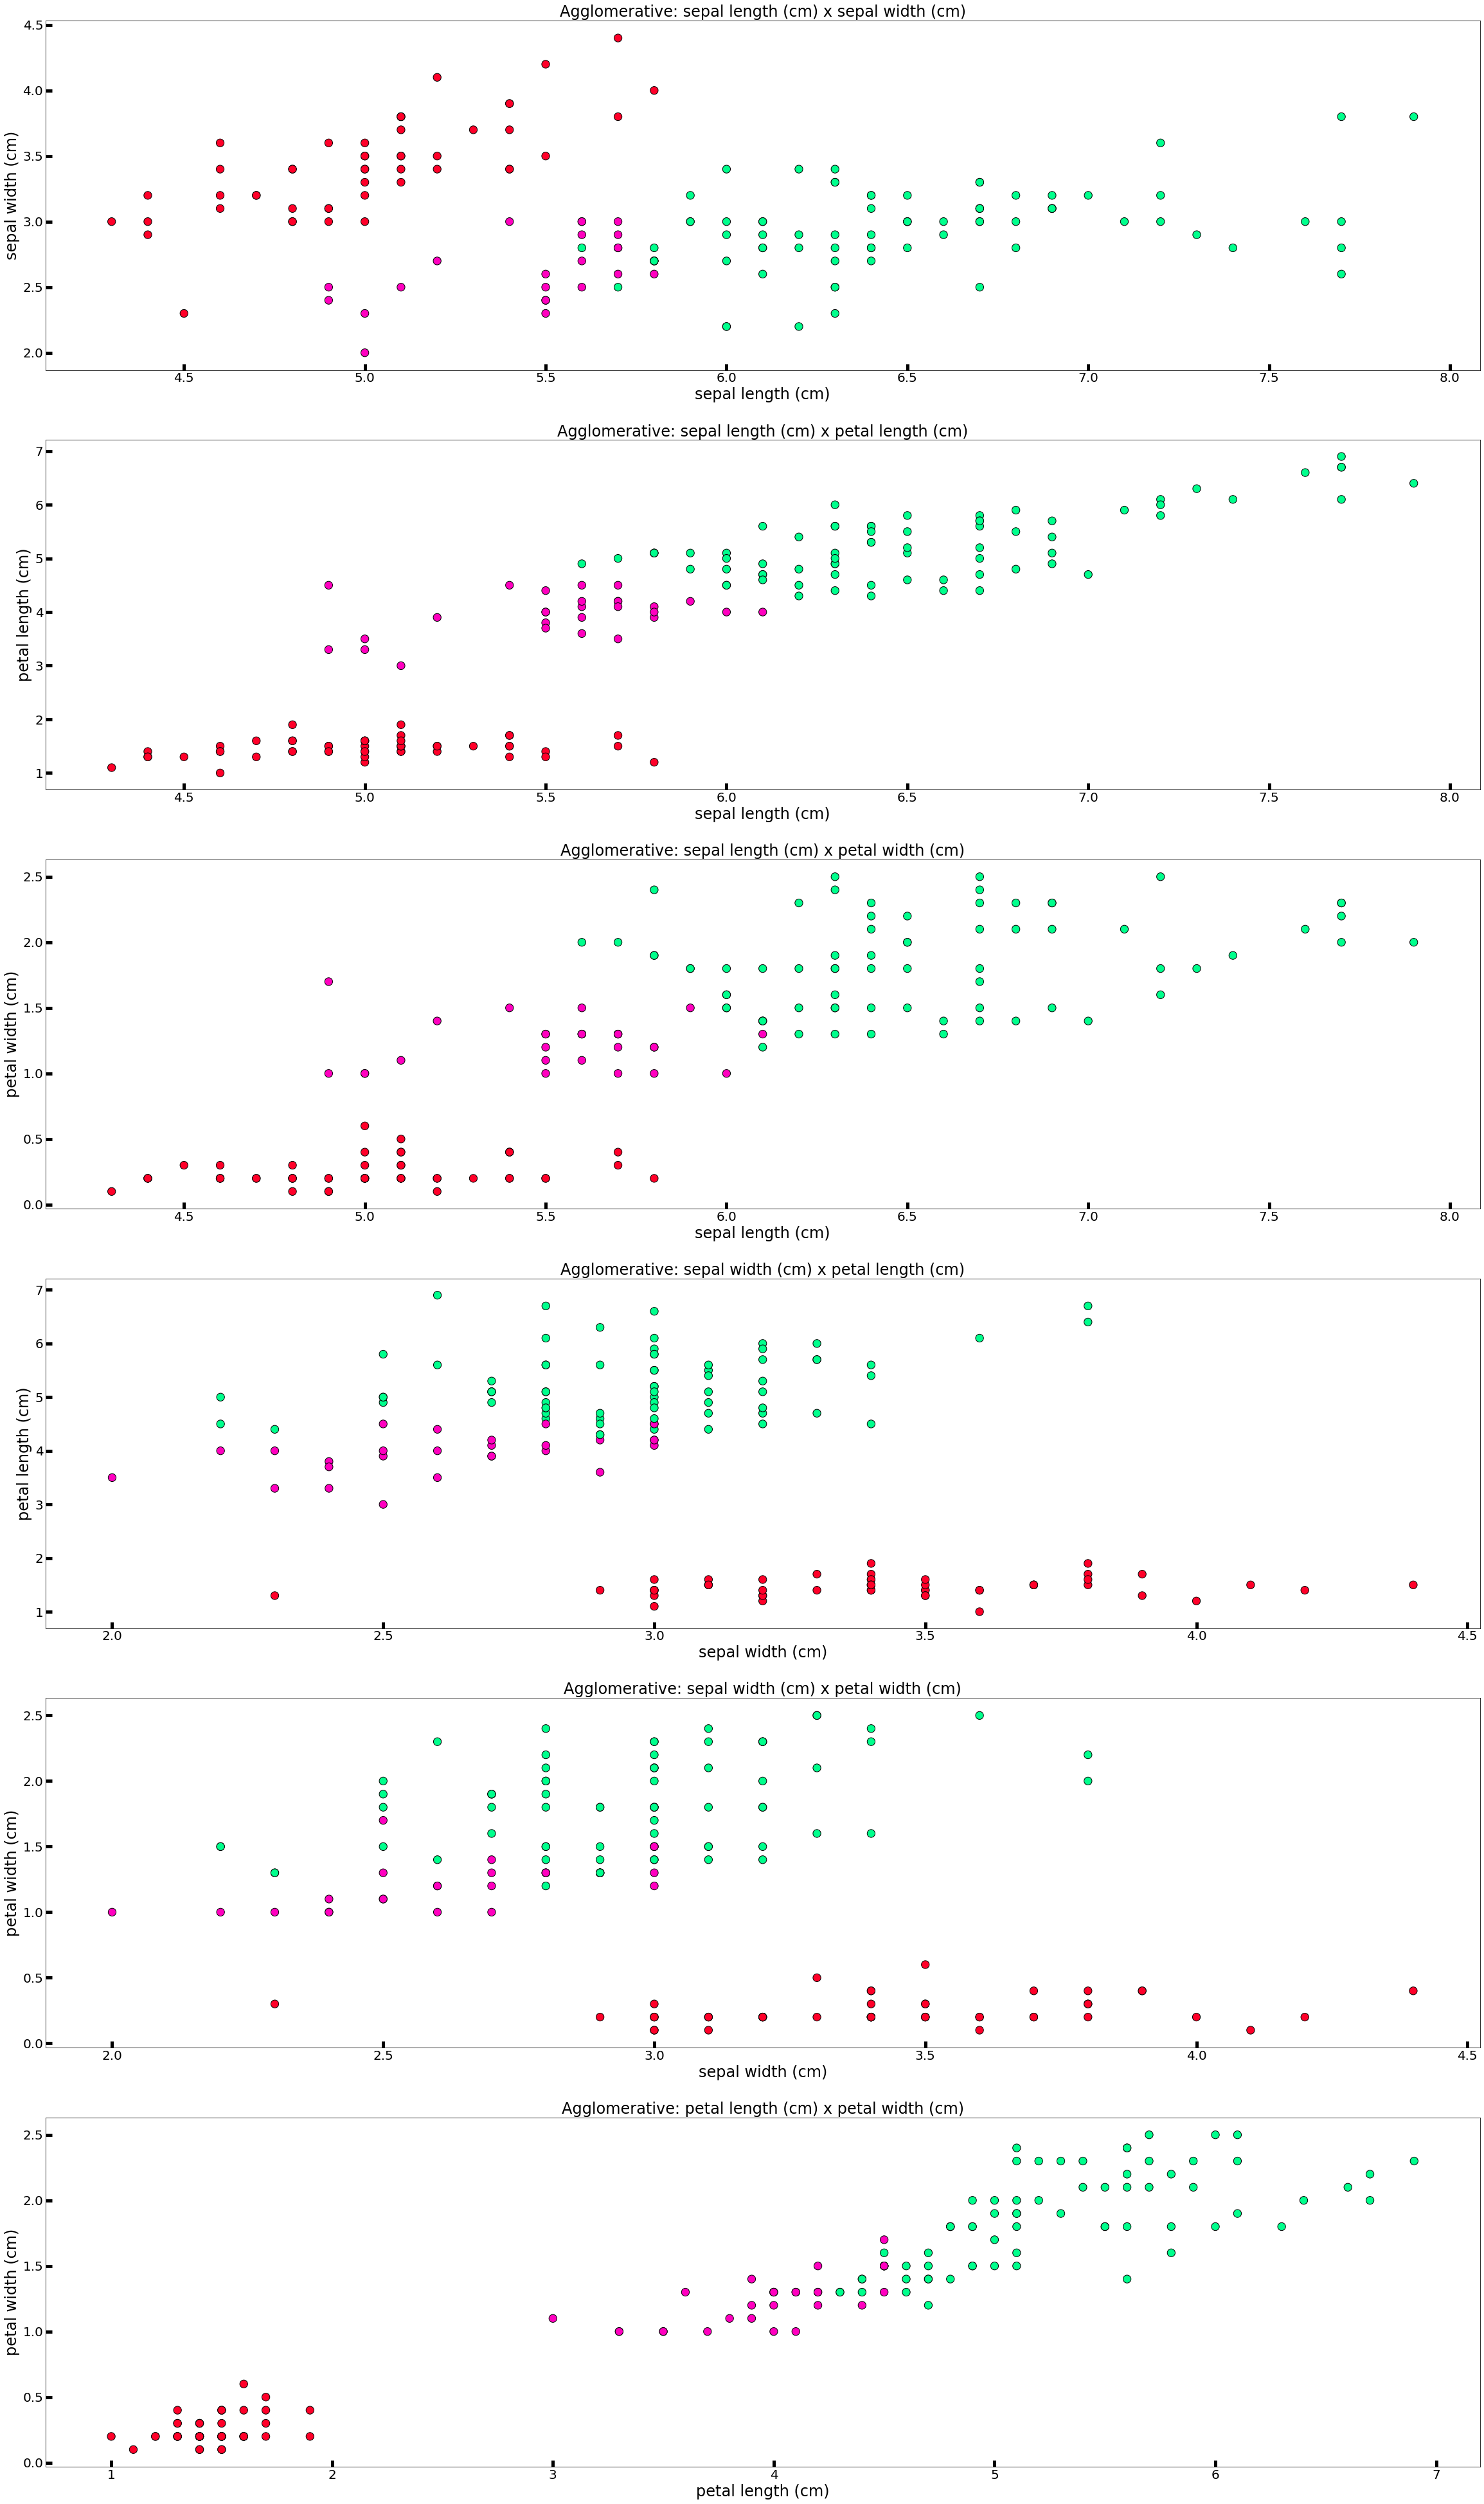

In [20]:
## Visualize data
total_plots = 0.5*(len(features)-1)*(1+len(features)-1)
fig, axes = plt.subplots(int(total_plots), figsize=(40, 70))

curr_idx = 0
for i in range(len(features)-1):
    for j in range (i+1, len(features)):        
        axes[curr_idx].scatter(X_data[:, i], X_data[:, j], c=agg1.labels_, cmap='gist_rainbow',
        edgecolor='k', s=150)
        axes[curr_idx].set_xlabel(features[i], fontsize=24)
        axes[curr_idx].set_ylabel(features[j], fontsize=24)
        axes[curr_idx].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
        axes[curr_idx].set_title('Agglomerative: '+features[i]+' x '+features[j], fontsize=24)
        curr_idx += 1

plt.show()

### Analisis Complete Linkage

Kluster yang dihasilkan dengan complete linkage menampilkan suatu data pada suatu kluster bisa saja berjarak dekat dengan data pada kluster lainnya. Hal ini disebabkan penghitungan jarak yang dipakai menggunakan jarak terjauh antara 2 kluster, sehingga untuk banyak kasus, complete linkage menjadi lebih baik dari pada single linkage, terutama apabila terdapat noisy data yang berdekatan dalam suatu kluster. 

## Agglomerative Average Linkage plot

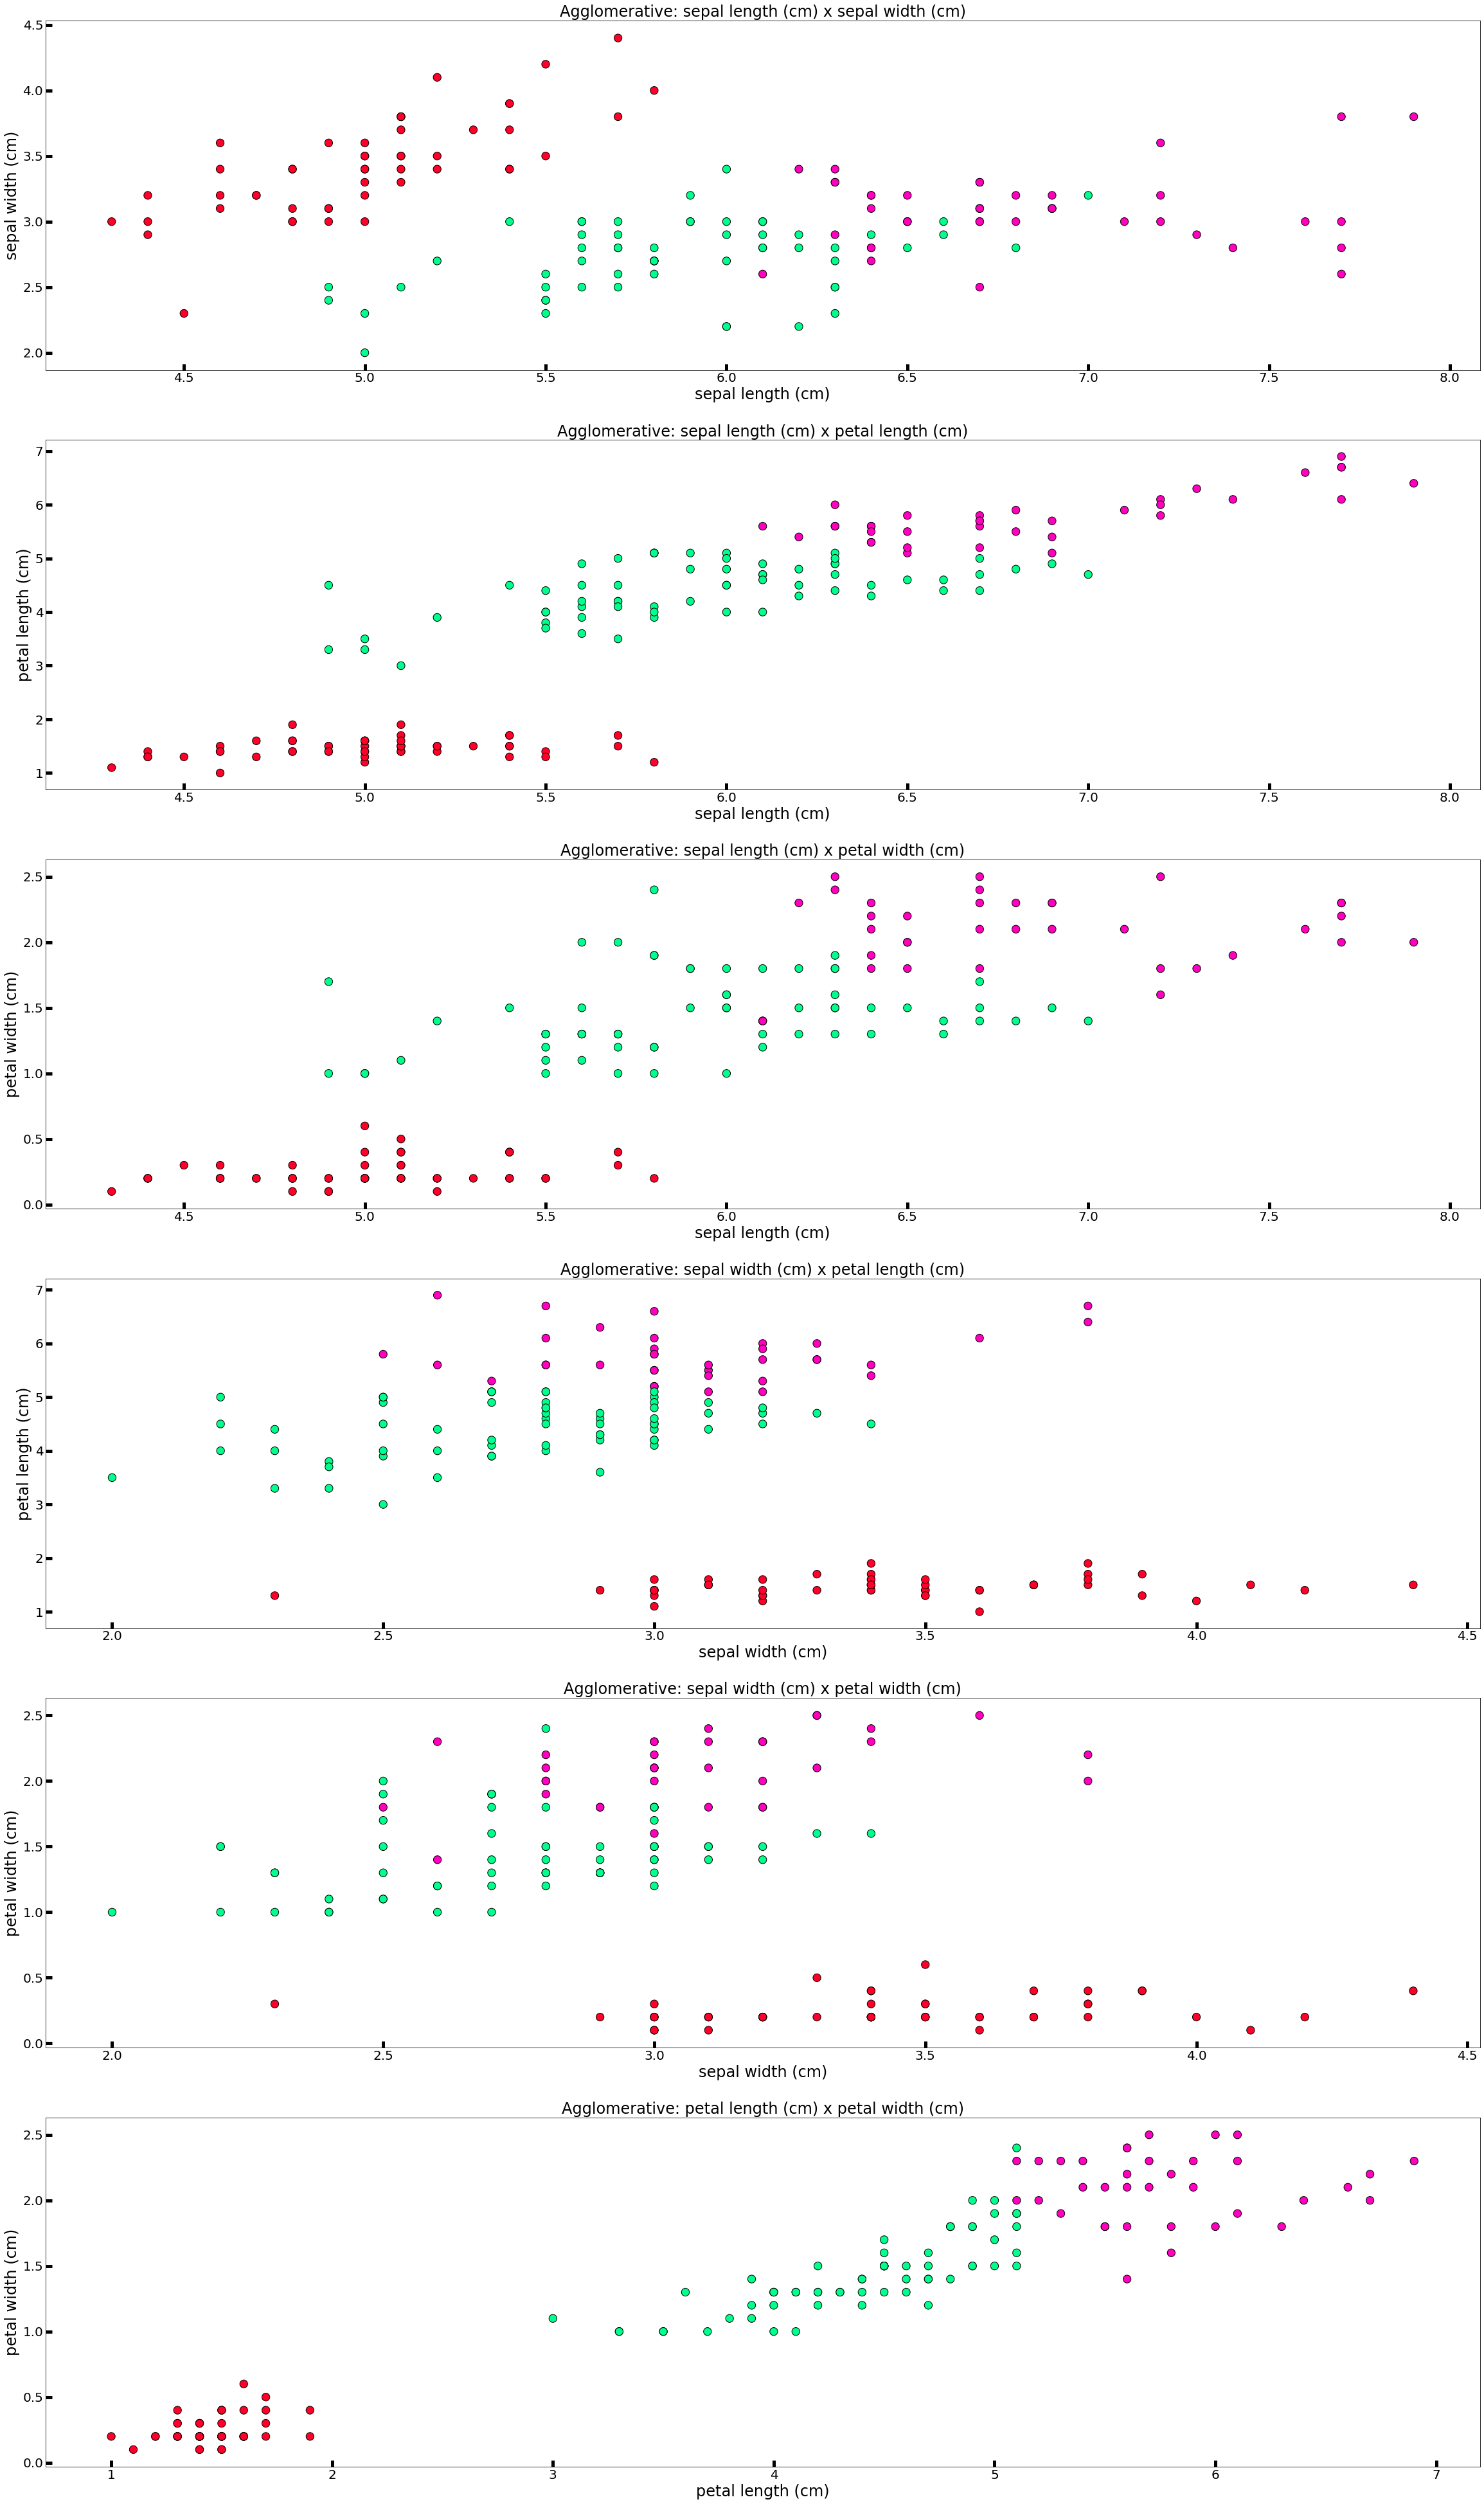

In [11]:
## Visualize data
total_plots = 0.5*(len(features)-1)*(1+len(features)-1)
fig, axes = plt.subplots(int(total_plots), figsize=(40, 70))

curr_idx = 0
for i in range(len(features)-1):
    for j in range (i+1, len(features)):
        axes[curr_idx].scatter(X_data[:, i], X_data[:, j], c=agg2.labels_, cmap='gist_rainbow',
        edgecolor='k', s=150)
        axes[curr_idx].set_xlabel(features[i], fontsize=24)
        axes[curr_idx].set_ylabel(features[j], fontsize=24)
        axes[curr_idx].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
        axes[curr_idx].set_title('Agglomerative: '+features[i]+' x '+features[j], fontsize=24)
        curr_idx += 1

plt.show()

### Analisis Average Linkage

Kluster yang dihasilkan dengan average linkage menampilkan kluster yang terbentuk cukup mirip dengan complete linkage maupun average group linkage. Kluster-kluster ini terbentuk dengan mengambil jarak paling minimum dari rata-rata jarak tiap pair dari dua kluster.

Dari keenam plot di atas, dapat dilihat bahwa secara rata-rata, jarak antara kluster 1 (hijau) dan kluster 2 (ungu) cukup dekat. Hal ini disebabkan average linkage yang menggunakan jarak rata-rata antara tiap pair data dari dua kluster dan kemudian bergabung dengan kluster yang memiliki nilai minimum dari jarak tersebut. Apabila kita ingin membentuk dua kluster dari data tersebut, maka akan terbentu kluster 0 (merah) dan kluster 1 (hijau) akan bergabung dengan kluster 2 (ungu), karena jarak rata-ratanya lebih minimal dibandingkan dengan jarak ke kluster merah.

## Agglomerative Average Group Linkage plot

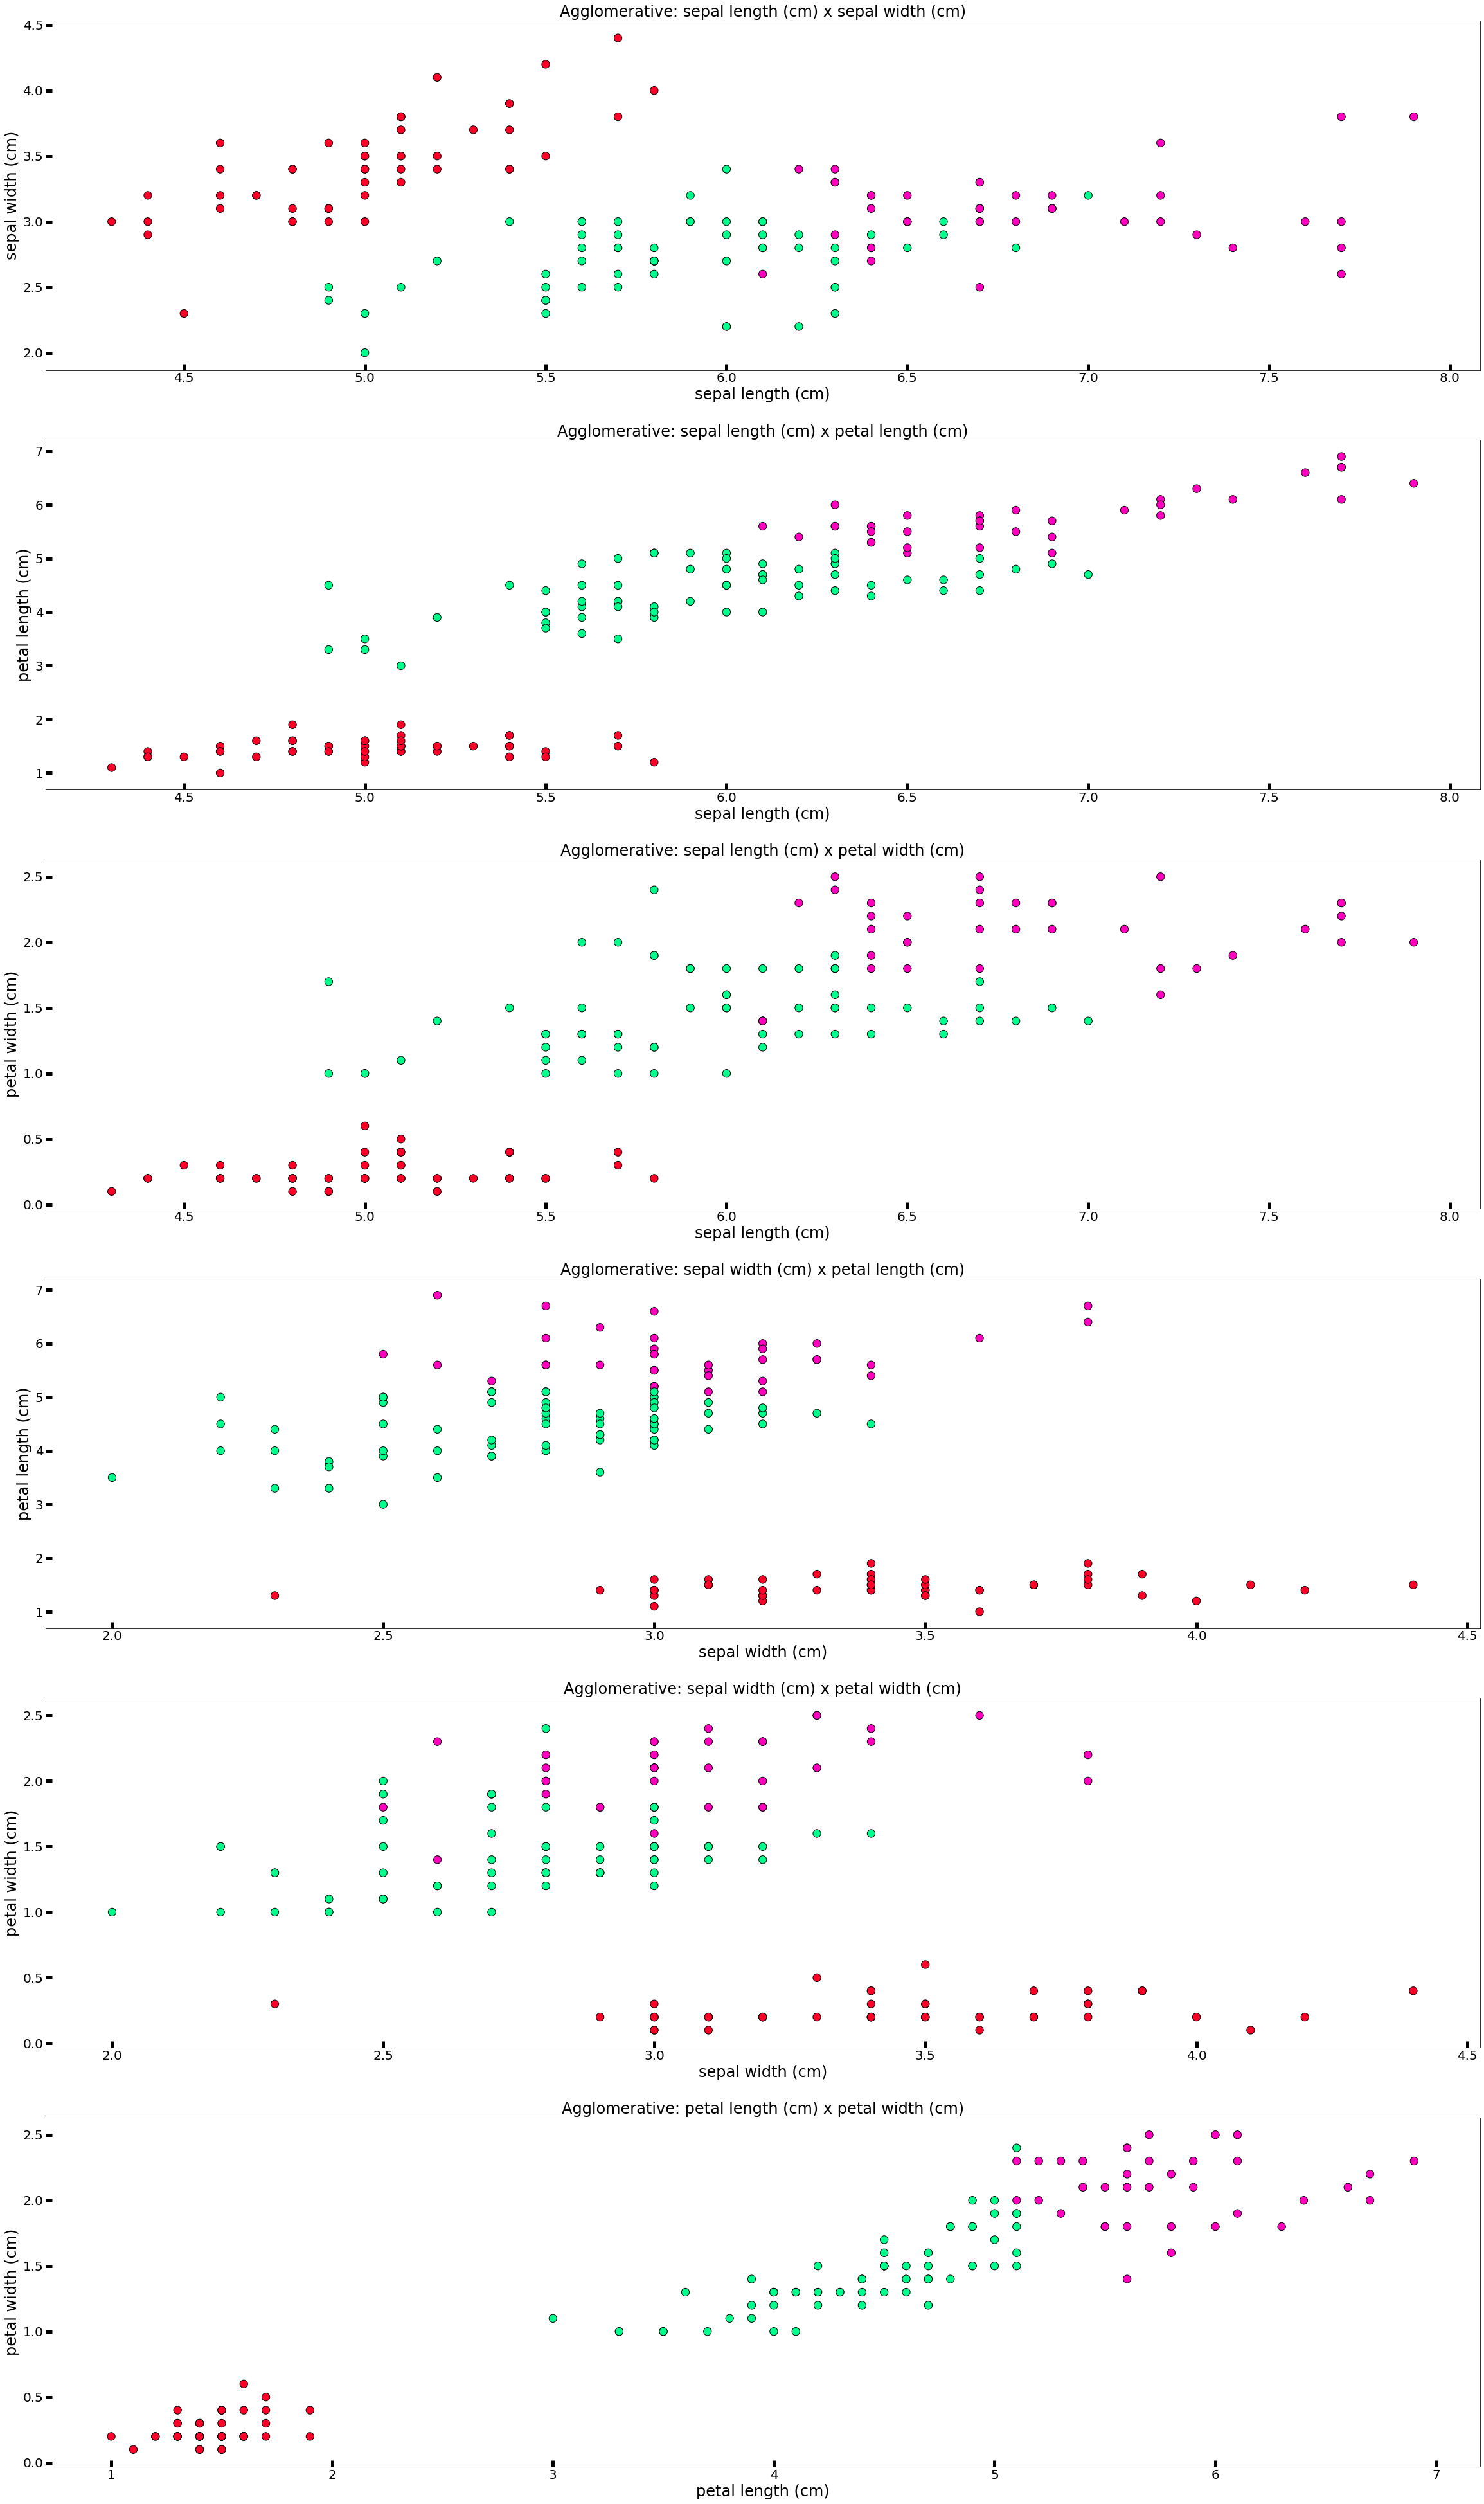

In [22]:
## Visualize data
total_plots = 0.5*(len(features)-1)*(1+len(features)-1)
fig, axes = plt.subplots(int(total_plots), figsize=(40, 70))

curr_idx = 0
for i in range(len(features)-1):
    for j in range (i+1, len(features)):
        
        axes[curr_idx].scatter(X_data[:, i], X_data[:, j], c=agg3.labels_, cmap='gist_rainbow',
        edgecolor='k', s=150)
        axes[curr_idx].set_xlabel(features[i], fontsize=24)
        axes[curr_idx].set_ylabel(features[j], fontsize=24)
        axes[curr_idx].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
        axes[curr_idx].set_title('Agglomerative: '+features[i]+' x '+features[j], fontsize=24)
        curr_idx += 1

plt.show()

### Analisis Average Group Linkage

Kluster yang dihasilkan dengan average group di atas secara kebetulan sama dengan kluster yang terbentuk dengan menggunakan average linkage. Pada average group linkage, cluster didapatkan dengan memilih jarak minimal tiap centroid dari pasangan cluster. Karena menggunakan centroid, average group linkage menjadi kurang baik apabila menangani data outlayers.

# Analisis Algoritma Agglomerative

- Dari semua percobaan algoritma agglomerative di atas, dapat dilihat bahwa algoritma agglomerative memerlukan waktu yang cukup lama apabila melakukan training penuh terhadap data. Kompleksitas algoritmanya mencapai O(n^3) secara kompleksitas waktu, dan O(n^2) secara kompleksitas ruang karena digunakan untuk menyimpan matriks cluster di tiap iterasi. Kelompok kami mencoba membuat pendekatan agar kompleksitas waktu dari algoritma agglomerative sedikit lebih baik, yaitu dengan tidak melakukan pembelajaran penuh dan berhenti saat n cluster yang diinginkan telah terbentuk. Oleh sebab itu, kompleksitas waktu algoritma ini dapat berkurang menjadi O(kn^2).

- Algoritma ini menghasilkan cluster yang stabil, artinya pembelajaran yang berulang akan selalu menghasilkan cluster yang sama. Hal ini tentu lebih baik dibandingkan dengan k-means yang hasilnya tidak stabil, bergantung pada inisialisasi centroid awal.

- Dari empat linkage yang kami implementasikan, sebenarnya tidak ada metode linkage yang benar/salah. Pemilihan linkage sebaiknya disesuaikan dengan *problem space* dan pendekatan yang ingin kita berikan untuk melakukan clustering data. Misalnya, untuk single linkage, metode ini cukup baik untuk mendapatkan cluster dengan data tetangga yang dekat. Namun, metode ini memiliki permasalahan yaitu *chaining effect*, di mana bisa jadi suatu cluster terbentuk karena adanya kedekatan dengan *noisy pattern* pada data. Dari sudut pandang tersebut, tentunya kita dapat memilih complete linkage karena akan menghasilkan hirarki cluster yang lebih baik. 